In [18]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot
import preprocessing as pre
#from preprocessing import mean_on_analyte_batch, 
import seaborn as sns
from itertools import combinations

import matplotlib.cm as cm


In [2]:

#cs = ["slide_21","slide_22","slide_ 26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [53]:
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)
data = a2.Data(spots_dj=spots_dj).outlier_filtering()

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning: invalid value encountered in double_scalars
  modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]


In [54]:
data.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Replica
2914,LF-0.0001,0.0001,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),1431.814059,3586.152509,0.333333,2018_03_21_slide_44,microarray_2018_03_21,38.0,14.0,0.0
5624,LF-0.0001,0.0001,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),1223.637224,6106.499414,0.312500,2018_03_21_slide_50,microarray_2018_03_21,7.0,14.0,0.0
3388,LF-0.0001,0.0001,LF,A/Brisbaine/59/2007(H1N1)-2018-04-13,A/Brisbaine/59/2007(H1N1),2894.283912,6809.464640,0.390625,2018_03_21_slide_56,microarray_2018_03_21,26.0,8.0,0.0
3091,LF-0.0001,0.0001,LF,Mi45-2018-04-13,Mi45,205.411765,241.230652,0.333333,2018_03_21_slide_60,microarray_2018_03_21,26.0,8.0,0.0
139,LF-0.0001,0.0001,LF,Mi45-2018-04-13,Mi45,2437.492754,6912.906230,0.312500,2018_03_21_slide_61,microarray_2018_03_21,38.0,14.0,0.0
4965,LF-0.0001,0.0001,LF,A/Hong Kong/4801/2014(H3N2)-2018-04-13,A/Hong Kong/4801/2014(H3N2),47553.331230,18710.357268,0.390625,2018_03_21_slide_62,microarray_2018_03_21,32.0,11.0,0.0
4338,LF-0.0001,0.0001,LF,A/Victoria/361/2011(H3N2)-2018-04-13,A/Victoria/361/2011(H3N2),11207.798107,15775.949758,0.312500,2018_03_21_slide_65,microarray_2018_03_21,32.0,11.0,0.0
3912,LF-0.001,1.0000,LF,A/Switzerland/9715293/2013(H3N2)-2018-04-13,A/Switzerland/9715293/2013(H3N2),4107.116719,9618.952261,0.328125,2018_03_21_slide_37,microarray_2018_03_21,45.0,1.0,0.0
3044,LF-0.001,1.0000,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),2333.558344,2010.274281,0.583333,2018_03_21_slide_44,microarray_2018_03_21,57.0,7.0,0.0
3730,LF-0.001,1.0000,LF,A/Aichi/2/68(H3N2)-X31-2018-04-13,A/Aichi/2/68(H3N2)-X31,7638.984227,12284.083761,0.312500,2018_03_21_slide_58,microarray_2018_03_21,20.0,4.0,0.0


In [55]:
mean_on_anlyte_batch = data.mean_on_analyte_batch()
mean_spots_grouped = mean_on_anlyte_batch.groupby("Analyte Batch")
grouped_combinations = combinations(mean_spots_grouped,2)

In [56]:
peptide_c_signif = data.ligand_batch_significance()


In [57]:
len(list(grouped_combinations))

78

In [64]:
peptide_c_signif.groupby("Ligand Batch").apply(lambda x: x["Significance"].max()).sort_values(ascending=False)

Ligand Batch
Nenad     0.998153
P050      0.994940
P125      0.991457
P103      0.987083
P072      0.980123
P131.2    0.979088
P135      0.975510
P059      0.974218
P083      0.973508
P089      0.971107
P080      0.944471
P132      0.939720
P067      0.934856
LF-0.1    0.927258
P123      0.893415
P082      0.888855
P118      0.886030
P131.1    0.885955
P130      0.883602
P010      0.876898
P120      0.871979
P116      0.847177
P084      0.846976
LF-0.5    0.830553
P070      0.817247
P043      0.802004
P106      0.779485
P124      0.763900
P095      0.761834
P098      0.756499
            ...   
P063      0.627859
P012      0.586785
P056      0.552828
P133      0.547620
P073      0.526282
P100      0.514241
P090      0.473495
P055      0.468556
P121      0.421095
P134      0.394685
P099      0.389636
P057      0.389020
P061      0.385883
P081      0.355614
P047      0.299342
P069      0.287298
P096      0.211460
P102      0.208684
P104      0.201654
P071      0.196412
P115      0.127429

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


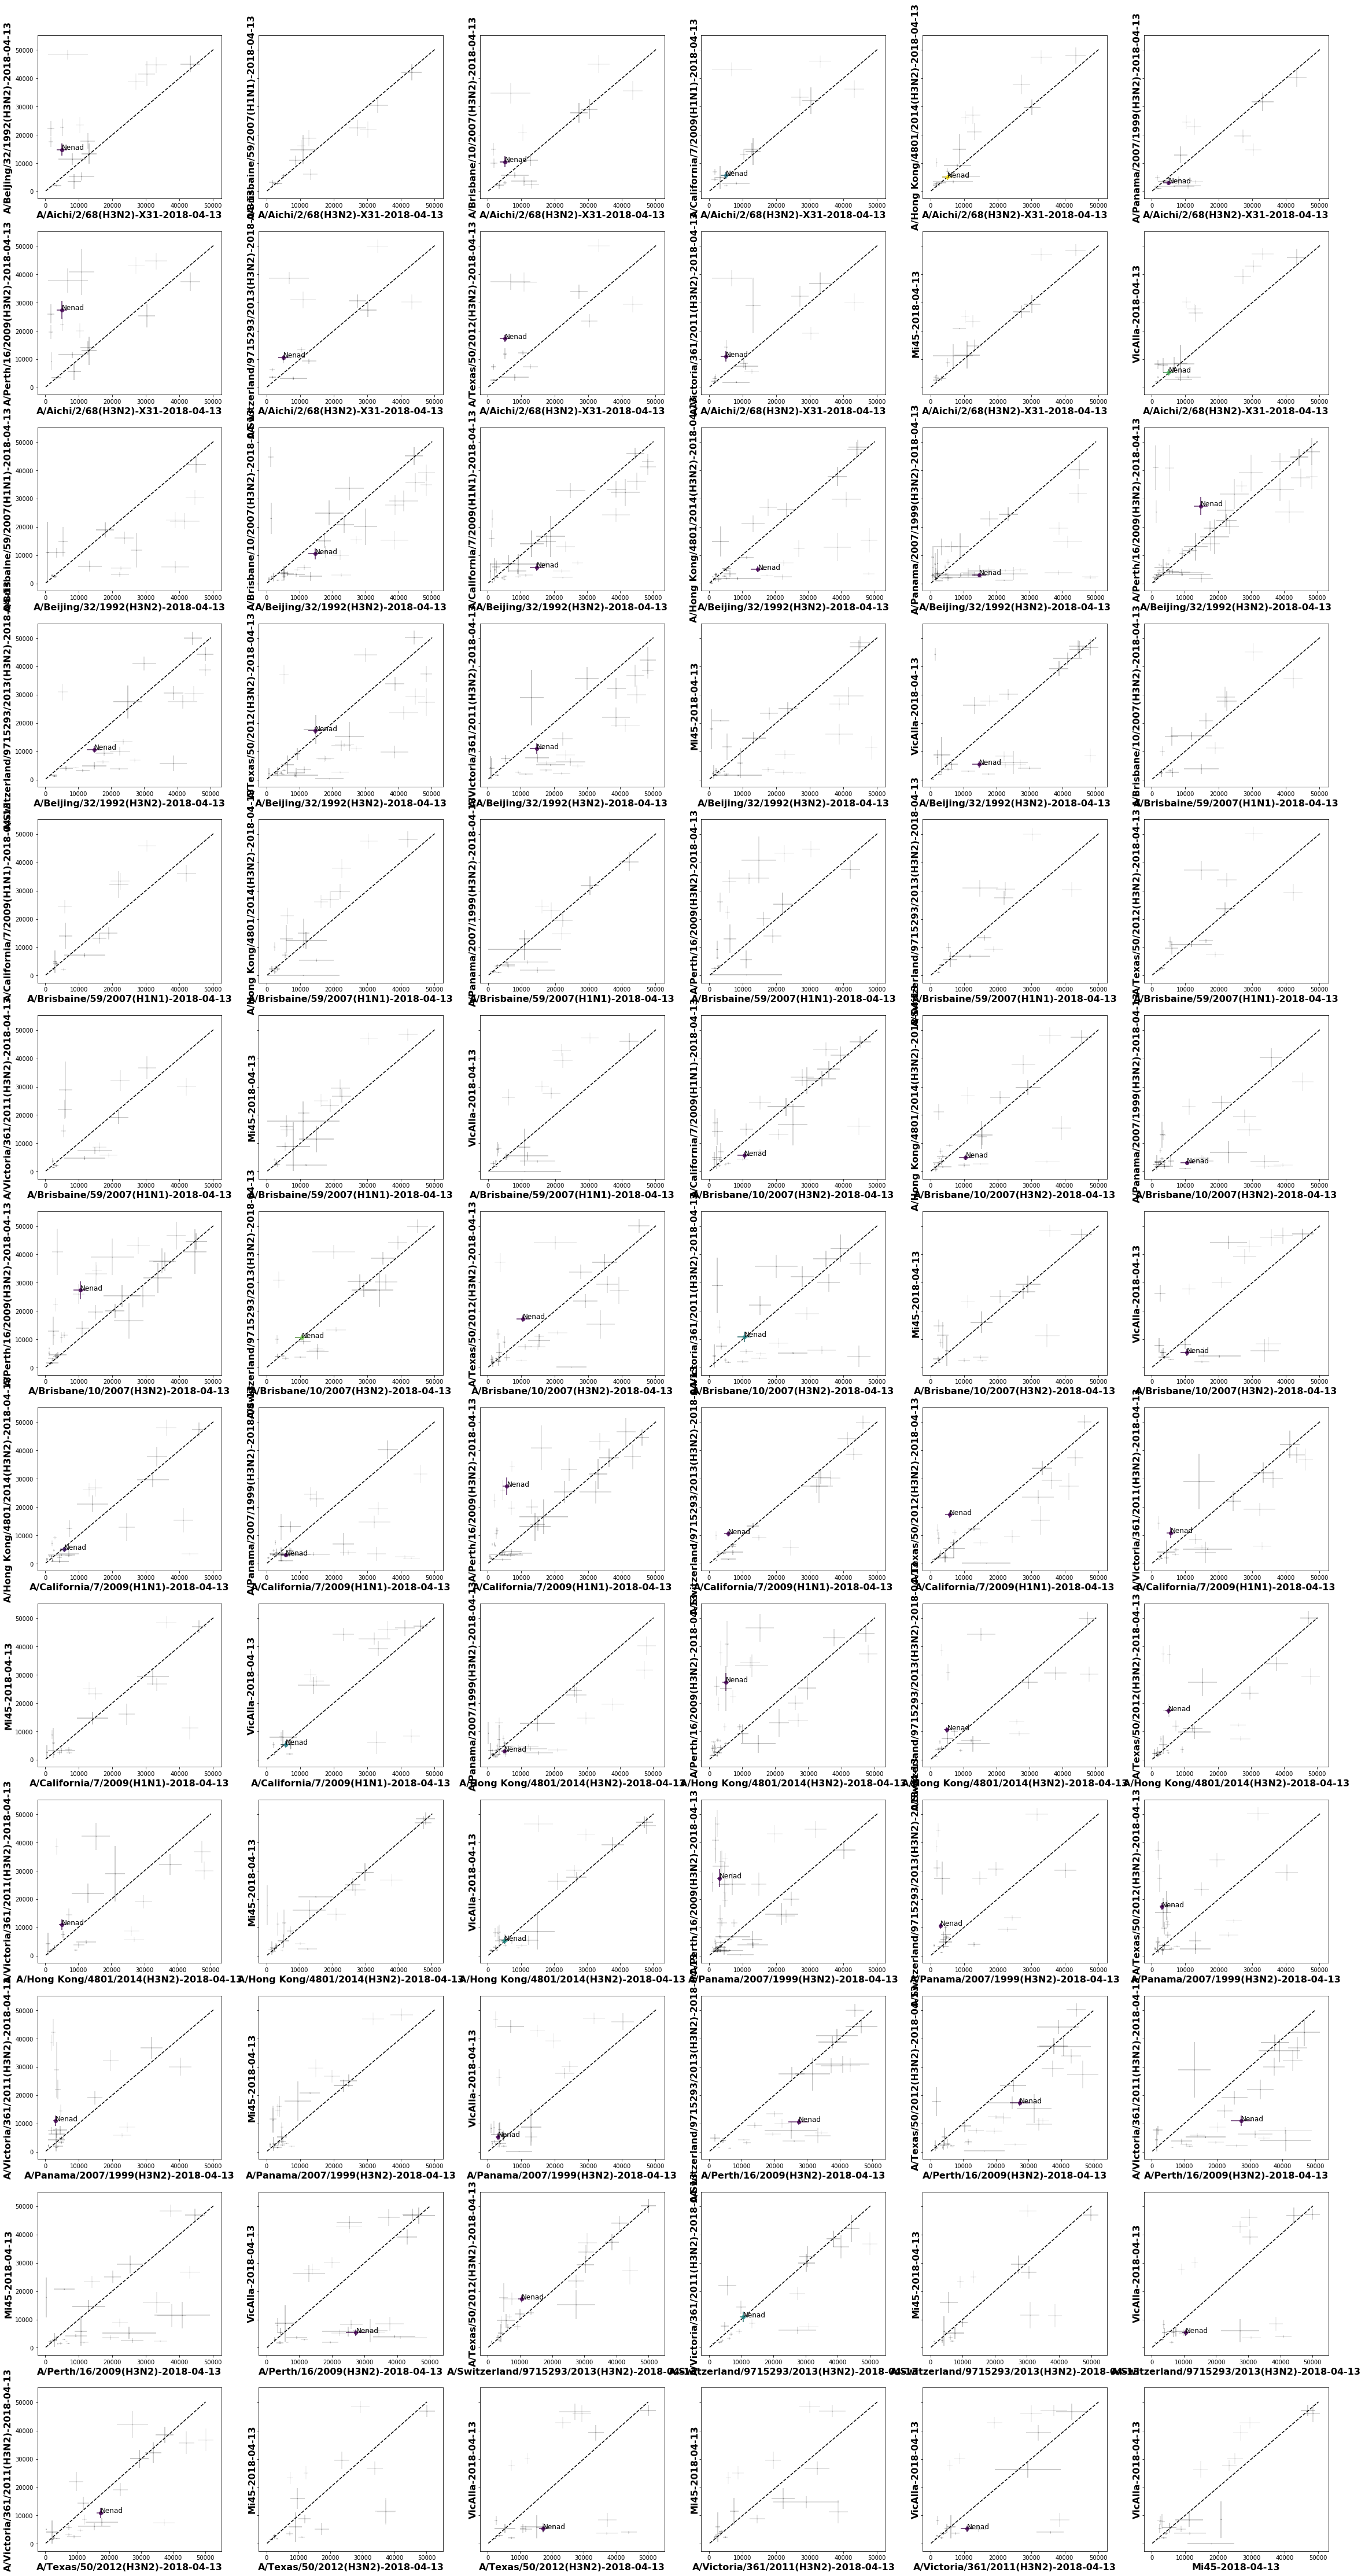

In [65]:
fig, axes = plt.subplots(ncols=6,nrows=13, figsize = (40,80), sharey=True)

ax_it = iter(axes.flatten())
peptide_c_signif.dropna(inplace=True)
cmap = cm.viridis
for name, d in peptide_c_signif.groupby("Analyte Batches"):
    x = y = np.linspace(peptide_c_signif.V1_I.min(),peptide_c_signif.V1_I.max())
    ax = next(ax_it)
    ax.plot(x,y,linestyle="--",marker=" ", c="k", alpha=1)
    #ax.set_title("{} vs. {}".format(name[1],name[0]), size = 20)
    ax.set_xlabel(name[0], size = 16, weight = 'bold')
    ax.set_ylabel(name[1], size = 16, weight = 'bold')
    #ax.set_xlim(0,x.max())
    #ax.set_ylim(0,y.max())

    
    #ax.set_xscale("log")
    #ax.set_yscale("log")



    #norm = Normalize(d.Significance.min(),d.Significance.max())
    d.sort_values("Significance",ascending=False, inplace=True)
    boundary = 0.15
    #d_selected = d[d["Significance"] < boundary]
    #d_n = d[d["Significance"] > boundary]
    
    
    d_n = d
    
    #d_selected = d.loc[d["Peptide"].isin(["Pep_80","Pep_43","Pep_55","Pep_56","Pep_59","Pep_61","Pep_63","Pep_83","Pep_94","Pep_95","Pep_98","Pep_100","Pep_102","Pep_103","Pep_121" ,"Pep_125","Pep_131.2","Nenad","Pep_49","Pep_50"])]
    d_selected = d.loc[d["Ligand Batch"].isin(["Nenad"])]
    #d_selected = d.loc[d["Peptide"].isin(["Pep_43","Pep_55","Pep_56","Pep_59","Pep_63","Pep_131.2"])]


    

    alphas = iter(np.linspace(0.3,0.05,len(d)))
    

    for ii, dp in d_selected.iterrows():
        #if dp.Significance is not np.NaN:
            c = cmap(dp.Significance)
            ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = c, fmt="o",linestyle="",alpha=0.8, capthick=2)
            ax.annotate(dp["Ligand Batch"],(dp.V1_I+0.01,dp.V2_I+0.01), size=12)
    
    for ii, dp in d_n.iterrows():
        c = cmap(dp.Significance)
        ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = "k", fmt="o",linestyle="",alpha=next(alphas), ms = 0.5, capthick=1)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    uri_name1 = name[0].replace("/","-")
    uri_name2 = name[1].replace("/","-")


#plt.savefig(directory+"all_correlations.png", bbox_inches="tight")    
plt.show()    

In [71]:
peptide_c_signif[peptide_c_signif["Ligand Batch"]=="P084"].sort_values(by="Significance")

,Ligand Batch,Analyte Batches,Significance,V1_I,V2_I,V1_Err,V2_Err,V1_Count,V2_Count
368,P084,"(A/Beijing/32/1992(H3N2)-2018-04-13, A/Hong Ko...",5.49394e-45,48392.7,3439.15,1758.8,506.195,23,15
412,P084,"(A/Beijing/32/1992(H3N2)-2018-04-13, A/Panama/...",1.0846e-42,48392.7,1867.91,1758.8,280.606,23,13
1620,P084,"(A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Swi...",2.34673e-41,3439.15,38660.9,506.195,2158.21,15,27
1842,P084,"(A/Panama/2007/1999(H3N2)-2018-04-13, A/Switze...",1.77971e-39,1867.91,38660.9,280.606,2158.21,13,27
1240,P084,"(A/California/7/2009(H1N1)-2018-04-13, A/Hong ...",1.13268e-38,43170.3,3439.15,2488.58,506.195,24,15
1279,P084,"(A/California/7/2009(H1N1)-2018-04-13, A/Panam...",1.06894e-36,43170.3,1867.91,2488.58,280.606,24,13
1649,P084,"(A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Tex...",2.31673e-35,3439.15,37335,506.195,2853.69,15,26
1875,P084,"(A/Panama/2007/1999(H3N2)-2018-04-13, A/Texas/...",1.05856e-33,1867.91,37335,280.606,2853.69,13,26
653,P084,"(A/Beijing/32/1992(H3N2)-2018-04-13, VicAlla-2...",5.56881e-32,48392.7,8411.3,1758.8,2470.26,23,10
1680,P084,"(A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Vic...",2.43194e-30,3439.15,38515.8,506.195,2855.36,15,18


In [69]:
peptide_c_signif.groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

Ligand Batch
P084      5.493943e-45
P055      4.261089e-43
P116      2.248574e-42
P056      6.715651e-42
P103      5.328310e-37
P095      3.624353e-36
Nenad     4.311728e-35
P120      1.615829e-34
P059      2.604975e-33
P098      1.252241e-31
P125      2.691845e-31
P094      1.992645e-30
P124      3.155571e-28
P043      4.761997e-28
P100      2.409461e-27
P073      4.325237e-27
P082      8.440890e-26
P080      1.085548e-24
P106      1.305040e-23
P131.1    1.008519e-22
P121      1.151910e-22
P102      9.694864e-22
P132      4.749624e-21
P069      3.613313e-20
P136      1.845444e-19
P105      1.041879e-18
P130      1.013107e-17
P010      2.170166e-17
P099      3.359271e-17
P135      4.954036e-15
              ...     
P090      5.125478e-10
P115      7.123438e-09
P061      1.308017e-08
P081      4.469893e-08
P131.2    4.929625e-08
P050      9.780481e-08
P134      3.075490e-07
P127      3.449973e-07
P072      1.839199e-06
P101      2.981630e-06
P083      5.735376e-06
P086      1.757314e-0